## Preamble

In [1]:
import numpy as np
from numpy import sqrt, pi, sin, cos, exp
import scipy.constants as consts
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/home/liang/src/')
import xenon
from importlib import reload  
xenon = reload(xenon)
print(xenon.__file__)

/home/liang/src/xenon/__init__.py


In [3]:
# %matplotlib notebook
%matplotlib inline

## Gary Fig 2.2

In [4]:
epsilon0 = 1.0
qe = -1.0
me = 1.0
n = 1.0
Te = 1.0

we = sqrt(n * qe**2 / me / epsilon0)
vte = sqrt(Te / me)
pe = n * Te
lame = vte / we
ke = 1.0 / lame

In [8]:
params = dict(epsilon0=epsilon0)

species = [
    [qe, me, n, 0, pe],
]

dr_args_vlasov = dict(
    species=species,
    params=params,
    J=12,
    sort='imag',
)

In [9]:
k0 = ke
knorm_name = '/k_e'
w0 = we
wnorm_name = '/\omega_{e}'

In [10]:
ks = k0 * np.linspace(0, 1, 30)[1:]
ws = xenon.vlasov.k2w_es1d(ks, **dr_args_vlasov)

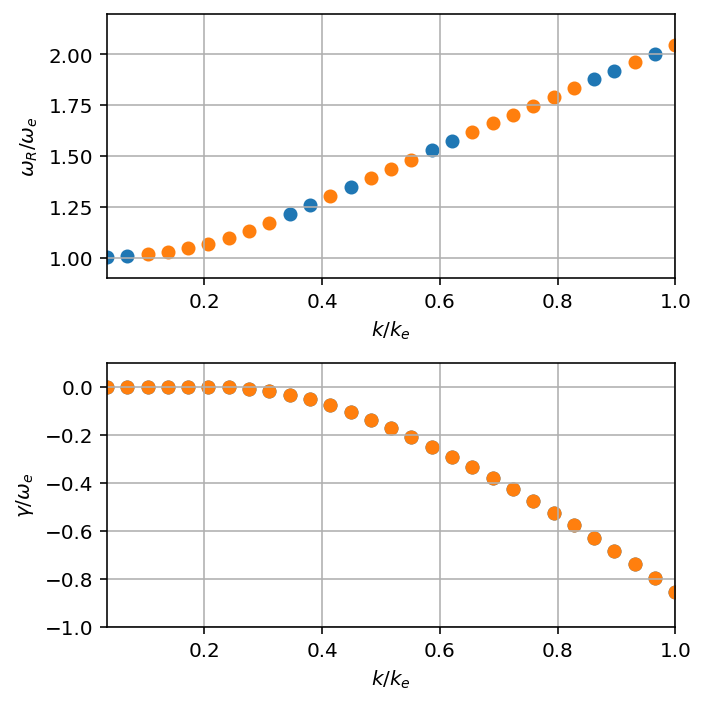

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5), dpi=144)

def wi_mask_func0(k, wi):
    k0, wi0 = 0, 0
    k1, wi1 = 1, -1
    return wi > (k-k0) * (wi1-wi0) / (k1-k0) + wi0

wi_mask_funcs = [wi_mask_func0]

xenon.common.plot_dr(ks,
                     ws,
                     knorm=k0,
                     wnorm=w0,
                     knorm_name=knorm_name,
                     wnorm_name=wnorm_name,
                     wi_mask_funcs = wi_mask_funcs,
                     ax0=axs[0],
                     ax1=axs[1])

ax = axs[0]
ax.set_ylim(1-0.1, 2.2)

ax = axs[1]
ax.set_ylim(-1, 0.1)

for ax in axs:
    ax.grid()

fig.tight_layout()

## Gary Fig 2.3

In [47]:
epsilon0 = 1.0
q = 1.0
me = 1.0
n = 1.0
Te = 1.0
mi__me = 1836.0
Ti__Te = 0.1 # 1 (Fig 2.3 left) or 0.1 (Fig 2.3 right)

qe, qi = -q, q
mi = me * mi__me
we = sqrt(n * qe**2 / me / epsilon0)
wi = sqrt(n * qi**2 / mi / epsilon0)

pe = n * Te
vte = sqrt(Te / me)
lame = vte / we
ke = 1.0 / lame

Ti = Te * Ti__Te
pi = n * Ti
vti = sqrt(Ti / mi)
lami = vti / wi
ki = 1.0 / lami

print(f'plasma frequencies = {we:g}, {wi:g}')
print(f'Debye lenghts = {lame:g}, {lami:g}')

plasma frequencies = 1, 0.023338
Debye lenghts = 1, 0.316228


In [48]:
params = dict(epsilon0=epsilon0)

species = [
    [qe, me, n, 0, pe],
    [qi, mi, n, 0, pi],
]

dr_args_vlasov = dict(
    species=species,
    params=params,
    sort='imag',
)

In [49]:
k0 = ki
knorm_name = '/k_i'
w0 = wi
wnorm_name = '/\omega_{i}'

In [50]:
ks = k0 * np.linspace(0, 1, 30)[1:]

In [51]:
ws = xenon.vlasov.k2w_es1d(ks, **dr_args_vlasov)

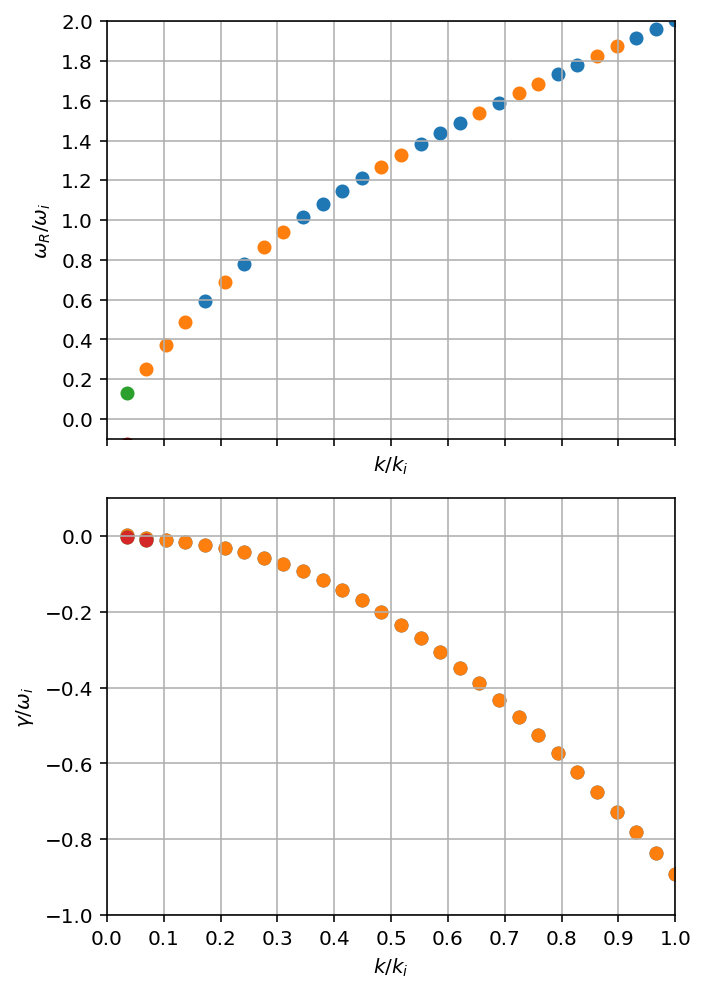

In [54]:
fig, axs = plt.subplots(2, 1, figsize=(5, 7), dpi=144, sharex=True)

def wi_mask_func0(k, wi):
    k0, wi0 = 0, 0
    k1, wi1 = 1, -1
    return wi > (k-k0) * (wi1-wi0) / (k1-k0) + wi0

wi_mask_funcs = [
    wi_mask_func0,
]

xenon.common.plot_dr(ks,
                     ws,
                     knorm=k0,
                     wnorm=w0,
                     knorm_name=knorm_name,
                     wnorm_name=wnorm_name,
                     wi_mask_funcs = wi_mask_funcs,
                     ax0=axs[0],
                     ax1=axs[1])

ax = axs[0]
ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 2)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))

ax = axs[1]
ax.set_ylim(-1, 0.1)

for ax in axs:
    ax.grid()

fig.tight_layout()

## Gary Fig 2.4

In [6]:
epsilon0 = 1.0
q = 1.0
me = 1.0
n = 1.0
Tc = 1.0 # for cold electron
mi__me = 1836.0
Ti__Tc = 1.0
Th__Tc = 10.0 # hot vs cold electron

qe, qi = -q, q
mi = me * mi__me
nc = 0.5 * n
nh = 0.5 * n
ni = n
wc = sqrt(nc * qe**2 / me / epsilon0)
wi = sqrt(ni * qi**2 / mi / epsilon0)
wh = sqrt(nh * qi**2 / mi / epsilon0)

pc = nc * Tc
vtc = sqrt(Tc / me)
lamc = vtc / wc
kc = 1.0 / lamc

Th = Tc * Th__Tc
ph = nh * Th
vth = sqrt(Th / me)
lamh = vth / wh
kh = 1.0 / lamh

Ti = Tc * Ti__Tc
pi = ni * Ti
vti = sqrt(Ti / mi)
lami = vti / wi
ki = 1.0 / lami

print(f'plasma frequencies = {wc:g}, {wi:g}, {wh:g}')
print(f'Debye lenghts = {lamc:g}, {lami:g}, {lamh:g}')

plasma frequencies = 0.707107, 0.023338, 0.0165025
Debye lenghts = 1.41421, 1, 191.625


In [8]:
params = dict(epsilon0=epsilon0)

species = [
    [qe, me, nc, 0, pc],
    [qi, mi, ni, 0, pi],
    [qe, me, nh, 0, ph],
]

dr_args_vlasov = dict(
    species=species,
    params=params,
    sort='real',
)

In [9]:
k0 = ki
knorm_name = '/k_i'
w0 = wi
wnorm_name = '/\omega_{i}'

In [10]:
ks = k0 * np.linspace(0, 0.5, 30)[1:]

In [11]:
ws = xenon.vlasov.k2w_es1d(ks, **dr_args_vlasov)

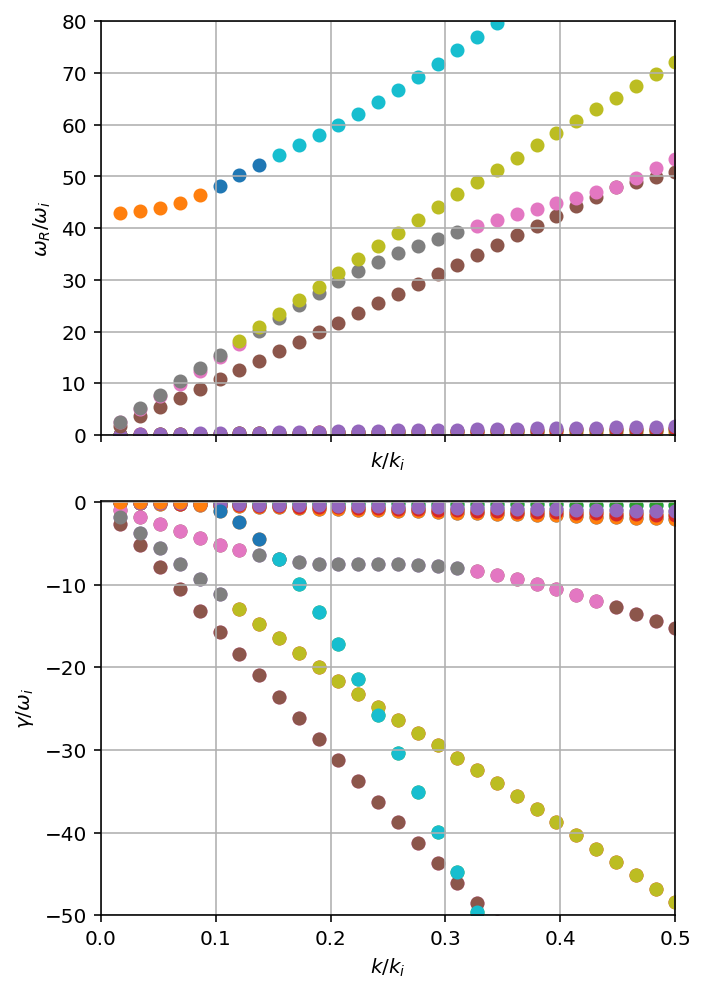

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(5, 7), dpi=144, sharex=True)


def wi_mask_func0(k, wi):
    k0, wi0 = 0, 0
    k1, wi1 = 0.3, -50
    return wi > (k - k0) * (wi1 - wi0) / (k1 - k0) + wi0


wi_mask_funcs = [
    wi_mask_func0,
]

xenon.common.plot_dr(ks,
                     ws,
                     knorm=k0,
                     wnorm=w0,
                     knorm_name=knorm_name,
                     wnorm_name=wnorm_name,
                     wi_mask_funcs=wi_mask_funcs,
                     ax0=axs[0],
                     ax1=axs[1])

ax = axs[0]
ax.set_xlim(0, 0.5)
ax.set_ylim(-0.1, 80)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))

ax = axs[1]
ax.set_ylim(-50, 0.1)

for ax in axs:
    ax.grid()

fig.tight_layout()